In [77]:
# Importación de las librerías que necesitamos:

# Tratamiento de datos
# -----------------------------
import pandas as pd
import numpy as np

# Visualización
# -----------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables y la distribución de las variables
# -----------------------------

#import scipy.stats as stats
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest

# Configuración para visualizar todas las columnas de los DataFrames
# -----------------------------
pd.set_option('display.max_columns', None)

# Gestión de los warnings
# -----------------------------
import warnings
warnings.filterwarnings("ignore")

#### Fase 1: Exploración y Limpieza

In [78]:
# Cargamos los csv y los pasamos a DataFrame para poder explorar los datos:

dfanalysis = pd.read_csv("files/Customer Flight Activity.csv")

dfanalysis.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [79]:
# Vamos a revisar si hay valores nulos en nuestros datos

dfanalysis.isna().sum()

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

In [80]:
"""
Vemos que no hay ningún valor nulo en nuestro conjunto de datos
""";

In [81]:
# Vamos a ver la forma de la tabla que tenemos:
dfanalysis.shape

(405624, 10)

In [82]:
"""
Tenemos 405.624 filas
""";

In [83]:
dfcustomer = pd.read_csv("files/Customer Loyalty History.csv")

dfcustomer.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [84]:
# Vamos a revisar si hay valores nulos en nuestros datos

dfcustomer.isna().sum()

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

In [85]:
"""
Vemos que hay valores nulos en las columnas "Salary", "Cancellation Year" y "Cancellation Month"
""";

In [86]:
# Vamos a ver la forma de la tabla que tenemos:
dfcustomer.shape

(16737, 16)

In [87]:
"""
Tenemos 16737 filas
""";

In [88]:
# Se ha observado que las dos tablas tienen en común el "Loyalty Number", por lo que vamos a correlacionar la información de ambas tablas en una sola. Así, vamos a poder trabajar con los datos.

df = dfanalysis.merge(dfcustomer, on="Loyalty Number")

df.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


In [89]:
df.shape

(405624, 25)

In [90]:
# Vamos a homogeneizar los nombres de las columnas:
col_nueva = []

for col in df.columns:
    col_nueva.append(col.replace(" ", "_").lower())

df.columns = col_nueva

df.head()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


In [91]:
# Revisión de los estadísticos de nuestro DataFrame para ver los valores de las columnas:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
loyalty_number,405624.0,550037.873084,258935.286969,100018.00,326961.00,550834.00,772194.00,999986.00
year,405624.0,2017.500000,0.500001,2017.00,2017.00,2017.50,2018.00,2018.00
month,405624.0,6.500000,3.452057,1.00,3.75,6.50,9.25,12.00
flights_booked,405624.0,4.115052,5.225518,0.00,0.00,1.00,8.00,21.00
flights_with_companions,405624.0,1.031805,2.076869,0.00,0.00,0.00,1.00,11.00
total_flights,405624.0,5.146858,6.521227,0.00,0.00,1.00,10.00,32.00
distance,405624.0,1208.880059,1433.155320,0.00,0.00,488.00,2336.00,6293.00
points_accumulated,405624.0,123.692721,146.599831,0.00,0.00,50.00,239.00,676.50
points_redeemed,405624.0,30.696872,125.486049,0.00,0.00,0.00,0.00,876.00
dollar_cost_points_redeemed,405624.0,2.484503,10.150038,0.00,0.00,0.00,0.00,71.00


In [92]:
# En el salario el mínimo es un valor negativo. Se entiende que esto habría que ponerlo en positivo

df["salary"] = df["salary"].abs()

In [93]:
# Revisión de nuevo de los estadísticos del DataFrame:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loyalty_number,405624.0,550037.873084,258935.286969,100018.00,326961.00,550834.00,772194.00,999986.00
year,405624.0,2017.500000,0.500001,2017.00,2017.00,2017.50,2018.00,2018.00
month,405624.0,6.500000,3.452057,1.00,3.75,6.50,9.25,12.00
flights_booked,405624.0,4.115052,5.225518,0.00,0.00,1.00,8.00,21.00
flights_with_companions,405624.0,1.031805,2.076869,0.00,0.00,0.00,1.00,11.00
total_flights,405624.0,5.146858,6.521227,0.00,0.00,1.00,10.00,32.00
distance,405624.0,1208.880059,1433.155320,0.00,0.00,488.00,2336.00,6293.00
points_accumulated,405624.0,123.692721,146.599831,0.00,0.00,50.00,239.00,676.50
points_redeemed,405624.0,30.696872,125.486049,0.00,0.00,0.00,0.00,876.00
dollar_cost_points_redeemed,405624.0,2.484503,10.150038,0.00,0.00,0.00,0.00,71.00


Gestión de nulos

In [94]:
# Vamos a realizar una gestión de los nulos que hemos visto anteriormente:

df.isna().sum()[df.isnull().sum() > 0]

salary                102672
cancellation_year     355560
cancellation_month    355560
dtype: int64

In [95]:
# Vamos a ver el porcentaje de nulos que tiene cada columna, para ver si podemos tratar con los datos

df.isnull().sum()[df.isnull().sum() > 0]/df.shape[0]*100

salary                25.312112
cancellation_year     87.657535
cancellation_month    87.657535
dtype: float64

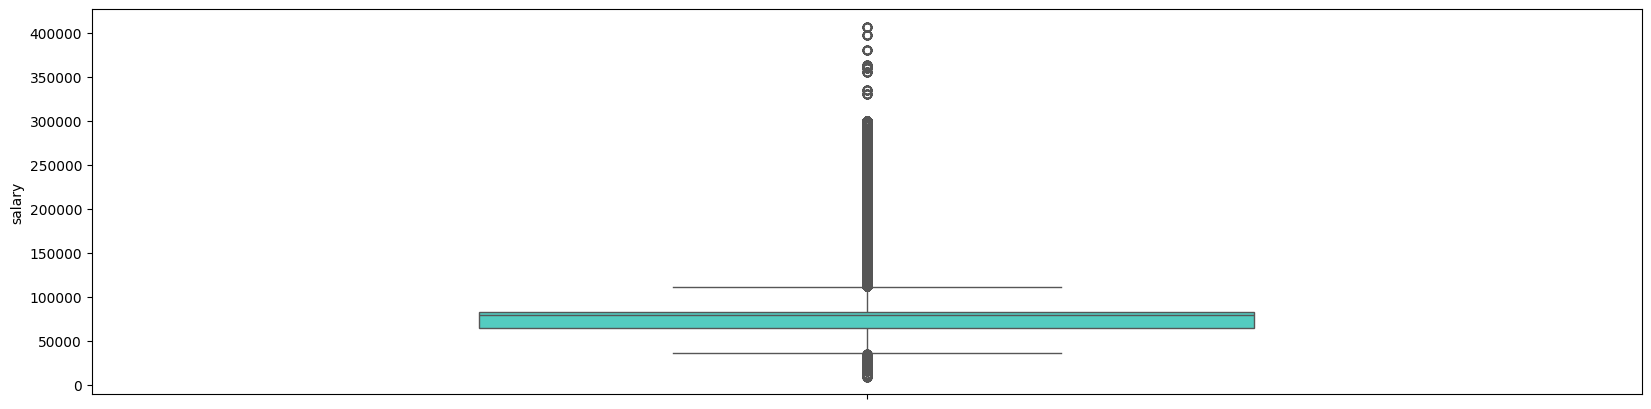

In [100]:
# Salary
# -----------------
    ## En el caso de esta columna, podemos imputar los datos, pero vamos a hacer un boxplot para ver como de dispersos se encuentran los datos ya que en el estadístico vemos que hay diferencia entre el salario mínimo y el máximo

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (20, 5))

sns.boxplot(y = "salary", 
            data = df, 
            width = 0.5, 
            color = "turquoise", 
            ax = axes);


In [101]:
"""
Se observa que hay muchos outliers, por lo que vamos a hacer la mediana
""";

mediana_salary = df["salary"].median(); 
df["salary"] = df ["salary"].fillna(mediana_salary) # reemplazar los nulos con la mediana
df.head()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.000000,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,79381.440228,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,79381.440228,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.000000,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.000000,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN
